<a href="https://colab.research.google.com/github/Ignis130913/Weather_prediction_using_ridge/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
w=pd.read_csv('/content/weather.csv',index_col="date")

In [5]:
w

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


In [6]:
w.loc["2012-01-01",:]

precipitation        0.0
temp_max            12.8
temp_min             5.0
wind                 4.7
weather          drizzle
Name: 2012-01-01, dtype: object

In [8]:
w.loc["2012-01-01":"2012-01-30",:]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
2012-01-06,2.5,4.4,2.2,2.2,rain
2012-01-07,0.0,7.2,2.8,2.3,rain
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-09,4.3,9.4,5.0,3.4,rain


In [17]:
w.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [21]:
w.shape

(1461, 5)

In [132]:
w.columns=["precip","temp_max","temp_min","wind","weather","target"]
w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1459 entries, 2012-01-01 to 2015-12-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   precip    1459 non-null   float64
 1   temp_max  1459 non-null   float64
 2   temp_min  1459 non-null   float64
 3   wind      1459 non-null   float64
 4   weather   1459 non-null   object 
 5   target    1459 non-null   object 
dtypes: float64(4), object(2)
memory usage: 112.1+ KB


In [26]:
w["temp_max"].value_counts()

 11.1    58
 14.4    49
 10.0    47
 12.8    46
 12.2    44
         ..
-0.5      1
-1.6      1
 35.6     1
-1.1      1
 35.0     1
Name: temp_max, Length: 67, dtype: int64

In [27]:
w[pd.isnull(w["precip"])]

,precip,temp_max,temp_min,wind,weather
date,,,,,


In [29]:
w.fillna(method="ffill")

,precip,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


In [37]:
w.dtypes

precip      float64
temp_max    float64
temp_min    float64
wind        float64
weather      object
dtype: object

In [38]:
w.index

Index(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
       '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
       ...
       '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
       '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', name='date', length=1461)

In [74]:
w.index=pd.to_datetime(w.index)
w.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='date', length=1461, freq=None)

In [75]:
w.index.year

Int64Index([2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
            ...
            2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
           dtype='int64', name='date', length=1461)

In [42]:
w.apply(lambda x : (x==999)).sum()

precip      0
temp_max    0
temp_min    0
wind        0
weather     0
dtype: int64

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
w['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

<Axes: xlabel='date'>

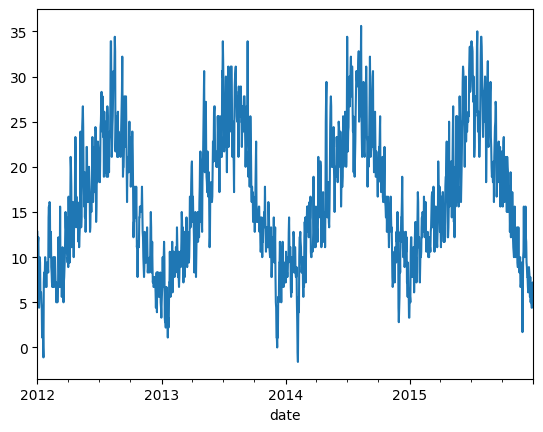

In [81]:
w["temp_max"].plot()

<Axes: xlabel='date'>

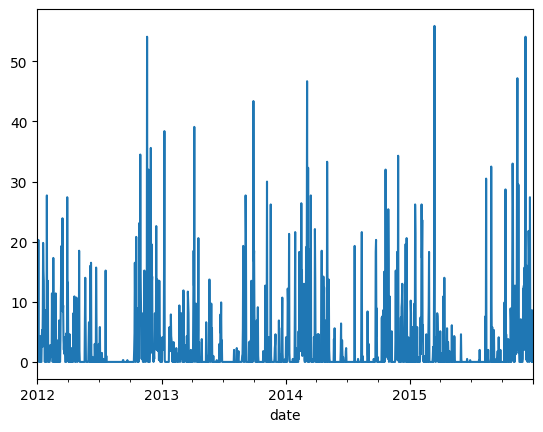

In [50]:
w["precip"].plot()

<Axes: >

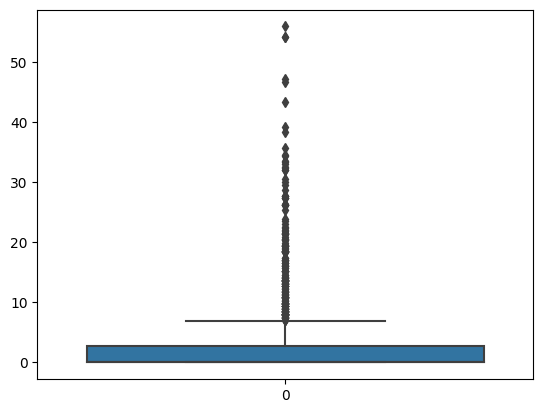

In [52]:
sns.boxplot(w["precip"])

<Axes: xlabel='precip', ylabel='temp_max'>

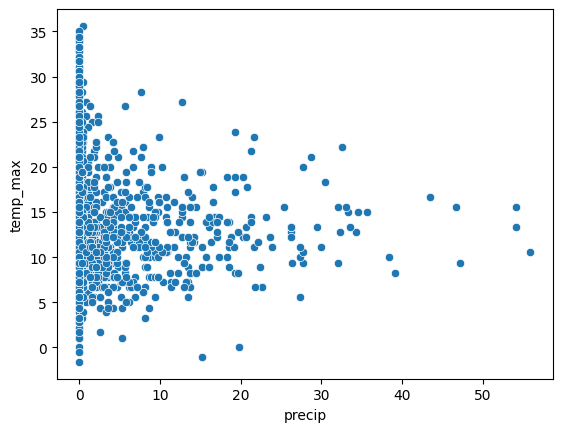

In [56]:
sns.scatterplot(x=w["precip"],y=w["temp_max"])

In [78]:
w.index.year.value_counts().sort_index()

2012    366
2013    365
2014    365
2015    365
Name: date, dtype: int64

In [130]:
w.groupby(w.index.month).sum()

<ipython-input-130-a43e162dc6fe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  w.groupby(w.index.month).sum()


,precipitation,temp_max,temp_min,wind
date,,,,
1,466.0,1020.4,334.4,389.2
2,422.0,1114.2,458.2,427.9
3,606.2,1536.0,602.5,443.9
4,375.4,1802.4,763.5,422.9
5,207.5,2392.7,1192.2,386.9
6,132.9,2688.0,1469.3,375.7
7,48.2,3223.8,1760.5,361.0
8,163.7,3237.9,1831.4,341.1
9,235.5,2630.9,1483.0,355.6


In [86]:
matrix=w.corr()
matrix

<ipython-input-86-daca4b68861b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix=w.corr()


,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


<Axes: >

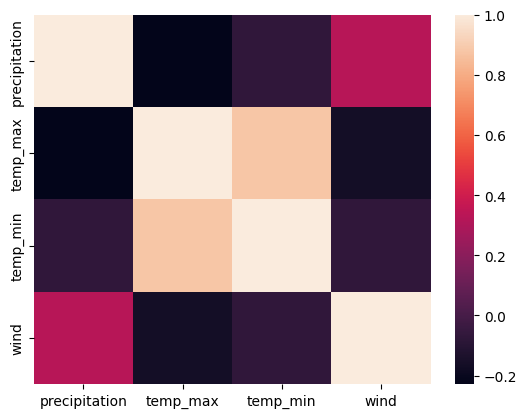

In [87]:
sns.heatmap(matrix)

In [92]:
w.groupby(w.index.month).sum()["precipitation"]

<ipython-input-92-32357aba8916>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  w.groupby(w.index.month).sum()["precipitation"]


date
1     466.0
2     422.0
3     606.2
4     375.4
5     207.5
6     132.9
7      48.2
8     163.7
9     235.5
10    503.4
11    642.5
12    622.7
Name: precipitation, dtype: float64

In [140]:
w["target"]=w.shift(-1)["precip"]
w

,precip,temp_max,temp_min,wind,weather,target
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,10.9
2012-01-02,10.9,10.6,2.8,4.5,rain,0.8
2012-01-03,0.8,11.7,7.2,2.3,rain,20.3
2012-01-04,20.3,12.2,5.6,4.7,rain,1.3
2012-01-05,1.3,8.9,2.8,6.1,rain,2.5
...,...,...,...,...,...,...
2015-12-25,5.8,5.0,2.2,1.5,rain,0.0
2015-12-26,0.0,4.4,0.0,2.5,sun,8.6
2015-12-27,8.6,4.4,1.7,2.9,rain,1.5


In [141]:
w=w.iloc[:-1,:].copy()

In [162]:
w

,precip,temp_max,temp_min,wind,target
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,10.9
2012-01-02,10.9,10.6,2.8,4.5,0.8
2012-01-03,0.8,11.7,7.2,2.3,20.3
2012-01-04,20.3,12.2,5.6,4.7,1.3
2012-01-05,1.3,8.9,2.8,6.1,2.5
...,...,...,...,...,...
2015-12-24,2.5,5.6,2.2,4.3,5.8
2015-12-25,5.8,5.0,2.2,1.5,0.0
2015-12-26,0.0,4.4,0.0,2.5,8.6


In [142]:
from sklearn.linear_model import Ridge
reg=Ridge(alpha=.1)

In [169]:
pred=["precip","temp_max","temp_min","wind"]
train=w.loc[:"2015-05-31":,]
test=w.loc["2015-06-01":]
train[pred]

,precip,temp_max,temp_min,wind
date,,,,
2012-01-01,0.0,12.8,5.0,4.7
2012-01-02,10.9,10.6,2.8,4.5
2012-01-03,0.8,11.7,7.2,2.3
2012-01-04,20.3,12.2,5.6,4.7
2012-01-05,1.3,8.9,2.8,6.1
...,...,...,...,...
2015-05-27,0.0,24.4,11.7,1.8
2015-05-28,0.0,27.8,12.2,2.1
2015-05-29,0.0,26.1,12.8,2.5


In [170]:
reg.fit(train[pred],train["target"])

Ridge(alpha=0.1)

In [171]:
predictions=reg.predict(test[pred])

In [174]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test["target"],predictions)

3.9100474246814194

In [183]:
combine=pd.concat([test["target"],pd.Series(predictions,index=test.index)], axis=1)
combine.columns=["actual","predictions"]
combine

,actual,predictions
date,,
2015-06-01,0.5,4.606262
2015-06-02,0.0,3.970757
2015-06-03,0.0,2.330171
2015-06-04,0.0,1.565286
2015-06-05,0.0,0.712198
...,...,...
2015-12-24,5.8,4.606577
2015-12-25,0.0,4.858454
2015-12-26,8.6,3.394428


In [188]:
w["precip"].value_counts()

0.0     835
0.3      54
0.5      40
1.0      26
1.5      25
       ... 
30.0      1
26.4      1
19.1      1
46.7      1
21.8      1
Name: precip, Length: 111, dtype: int64

<Axes: xlabel='date'>

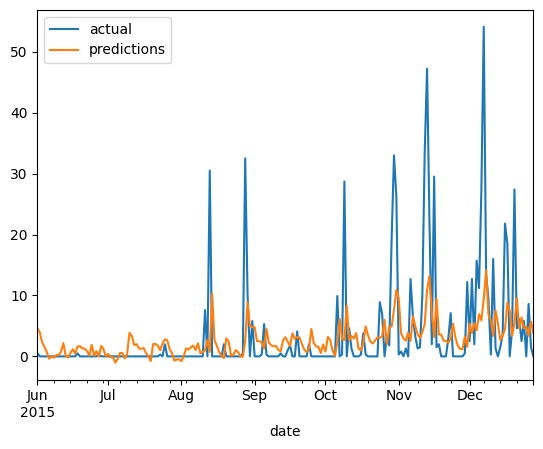

In [189]:
combine.plot()

In [190]:
reg.coef_

array([ 0.18922894, -0.33931486,  0.35266384,  0.20577432])

In [194]:
w["month_max"]=w["precip"].rolling(30).mean()
w.fillna(0)

,precip,temp_max,temp_min,wind,target,month_max
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,10.9,0.000000
2012-01-02,10.9,10.6,2.8,4.5,0.8,0.000000
2012-01-03,0.8,11.7,7.2,2.3,20.3,0.000000
2012-01-04,20.3,12.2,5.6,4.7,1.3,0.000000
2012-01-05,1.3,8.9,2.8,6.1,2.5,0.000000
...,...,...,...,...,...,...
2015-12-24,2.5,5.6,2.2,4.3,5.8,8.970000
2015-12-25,5.8,5.0,2.2,1.5,0.0,9.163333
2015-12-26,0.0,4.4,0.0,2.5,8.6,9.163333


In [197]:
w["month_day_max"]=w["month_max"]/w["precip"]
w["temp"]=w["temp_max"]/w["temp_min"]
w

,precip,temp_max,temp_min,wind,target,month_max,month_day_max,temp
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,10.9,NaN,NaN,2.560000
2012-01-02,10.9,10.6,2.8,4.5,0.8,NaN,NaN,3.785714
2012-01-03,0.8,11.7,7.2,2.3,20.3,NaN,NaN,1.625000
2012-01-04,20.3,12.2,5.6,4.7,1.3,NaN,NaN,2.178571
2012-01-05,1.3,8.9,2.8,6.1,2.5,NaN,NaN,3.178571
...,...,...,...,...,...,...,...,...
2015-12-24,2.5,5.6,2.2,4.3,5.8,8.970000,3.588000,2.545455
2015-12-25,5.8,5.0,2.2,1.5,0.0,9.163333,1.579885,2.272727
2015-12-26,0.0,4.4,0.0,2.5,8.6,9.163333,inf,inf


In [198]:
pred=["precip","temp_max","temp_min","wind","month_max","month_day_max","temp"]
train=w.loc[:"2015-05-31":,]
test=w.loc["2015-06-01":]
train[pred]

,precip,temp_max,temp_min,wind,month_max,month_day_max,temp
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,NaN,NaN,2.560000
2012-01-02,10.9,10.6,2.8,4.5,NaN,NaN,3.785714
2012-01-03,0.8,11.7,7.2,2.3,NaN,NaN,1.625000
2012-01-04,20.3,12.2,5.6,4.7,NaN,NaN,2.178571
2012-01-05,1.3,8.9,2.8,6.1,NaN,NaN,3.178571
...,...,...,...,...,...,...,...
2015-05-27,0.0,24.4,11.7,1.8,0.553333,inf,2.085470
2015-05-28,0.0,27.8,12.2,2.1,0.493333,inf,2.278689
2015-05-29,0.0,26.1,12.8,2.5,0.493333,inf,2.039062


In [206]:
w=w.iloc[30:,:].copy()
w['month_day_max'].replace([np.inf],max(w['month_day_max']),inplace=True)
w['temp'].replace([np.inf],max(w['temp']),inplace=True)
w

,precip,temp_max,temp_min,wind,target,month_max,month_day_max,temp
date,,,,,,,,
2012-04-30,4.3,12.8,7.2,8.0,0.5,2.270000,0.527907,1.777778
2012-05-01,0.5,11.7,6.1,6.4,0.5,2.236667,4.473333,1.918033
2012-05-02,0.5,13.3,5.6,2.5,18.5,2.253333,4.506667,2.375000
2012-05-03,18.5,11.1,7.2,3.4,1.8,2.820000,0.152432,1.541667
2012-05-04,1.8,12.2,6.1,4.6,0.0,2.880000,1.600000,2.000000
...,...,...,...,...,...,...,...,...
2015-12-24,2.5,5.6,2.2,4.3,5.8,8.970000,3.588000,2.545455
2015-12-25,5.8,5.0,2.2,1.5,0.0,9.163333,1.579885,2.272727
2015-12-26,0.0,4.4,0.0,2.5,8.6,9.163333,inf,inf


In [211]:
w['temp'].replace([np.inf],max(w['temp']))
w.apply(lambda x: (x==np.inf)).sum()["month_day_max"]

769

In [212]:
w.apply(lambda x: (x==np.inf)).sum()["temp"]

14

In [213]:
w.corr()["target"]

precip           0.313845
temp_max        -0.196727
temp_min        -0.081434
wind             0.172065
target           1.000000
month_max        0.232675
month_day_max   -0.042584
temp            -0.027902
Name: target, dtype: float64

In [216]:
combine["diff"]=combine["actual"]-combine["predictions"].abs()
combine

,actual,predictions,diff
date,,,
2015-06-01,0.5,4.606262,-4.106262
2015-06-02,0.0,3.970757,-3.970757
2015-06-03,0.0,2.330171,-2.330171
2015-06-04,0.0,1.565286,-1.565286
2015-06-05,0.0,0.712198,-0.712198
...,...,...,...
2015-12-24,5.8,4.606577,1.193423
2015-12-25,0.0,4.858454,-4.858454
2015-12-26,8.6,3.394428,5.205572


In [217]:
combine.sort_values("diff", ascending=False).head()

,actual,predictions,diff
date,,,
2015-12-07,54.1,9.418199,44.681801
2015-11-13,47.2,10.851833,36.348167
2015-08-28,32.5,2.598125,29.901875
2015-08-13,30.5,0.724627,29.775373
2015-11-12,33.5,5.292718,28.207282
